# Analysis of Molecular Variance

In [14]:
library(adegenet)
library(poppr)
set.seed(6969)

In [2]:
infile <- "../inputfiles/bft.kinless.gen"
bft <- read.genepop(infile, ncode = 3L, quiet = T)
metadata <- read.csv("../inputfiles/bft.strata", sep = ",", header = T)
names(metadata) <- c("name", "year","ignore1", "ignore2","region","locality", "lat", "long")

Add the proper strata into the `@other` slot in the Genind

In [3]:
strata(bft) <- metadata[,c(-3, -4, -7, -8)]
head(strata(bft))

,name,year,region,locality
,<fct>,<fct>,<fct>,<fct>
1,BRZ_1261,2016,BRZ,BRZ
2,BRZ_1269,2016,BRZ,BRZ
3,BRZ_1270,2016,BRZ,BRZ
4,BRZ_1271,2016,BRZ,BRZ
5,BRZ_1275,2016,BRZ,BRZ
6,BRZ_1276,2016,BRZ,BRZ


## Generate genetic distances

In [4]:
gen.dist <- dist(x = bft, method = "euclidean", diag=TRUE, upper=TRUE)
head(gen.dist)

[1] 26.93080 25.78731 26.97863 28.17190 28.38956 28.10183

## AMOVA locality/year

In [5]:
amv.yr.loc <- poppr.amova(bft, hier = ~locality/year, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.yr.loc

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                                 Df     Sum Sq  Mean Sq
Between locality                  8  118.59321 14.82415
Between samples Within locality   5   72.05354 14.41071
Within samples                  310 4231.48419 13.64995
Total                           323 4422.13094 13.69081

$componentsofcovariance
                                                   Sigma            %
Variations  Between locality                 0.006010593   0.04389028
Variations  Between samples Within locality  0.038629795   0.28208071
Variations  Within samples                  13.649948994  99.67402901
Total variations                            13.694589382 100.00000000

$statphi
                              Phi
Phi-samples-total    0.0032597099
Phi-samples-locality 0.0028220457
Phi-locality-total   0.0004389028


### Test for significance

In [6]:
signif.yr.loc <- randtest(amv.yr.loc, nrepet = 999)
signif.yr.loc

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.yr.loc, nrepet = 999)

Number of tests:   3 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                         Test          Obs   Std.Obs   Alter Pvalue
1   Variations within samples 13.649948994 -8.728761    less  0.001
2  Variations between samples  0.038629795  4.027994 greater  0.001
3 Variations between locality  0.006010593  0.450219 greater  0.334


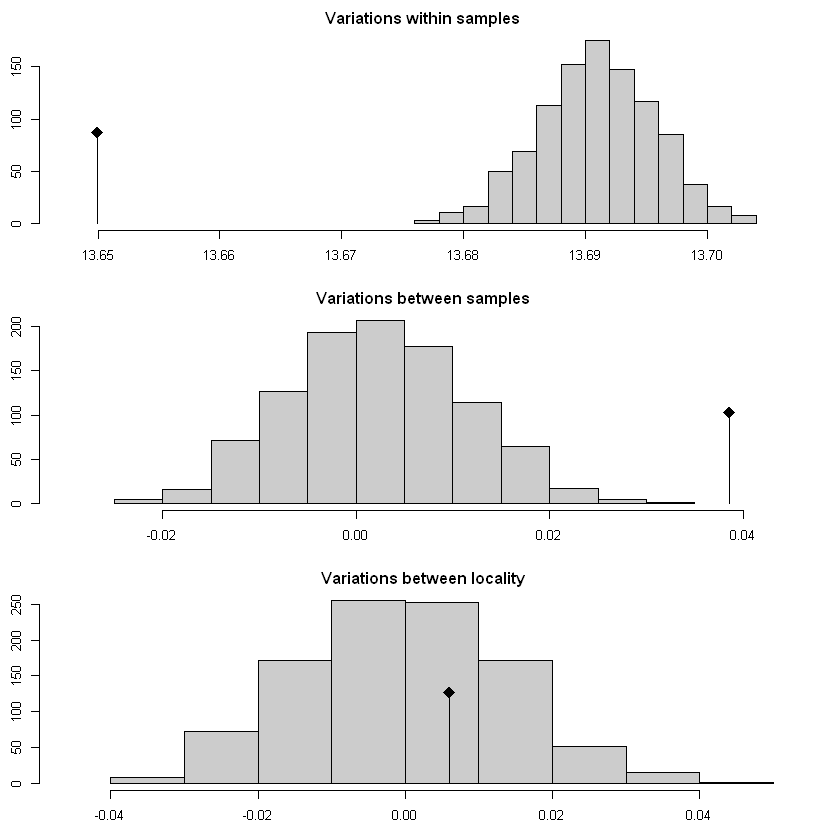

In [7]:
plot(signif.yr.loc)

## AMOVA region/year

In [8]:
amv.yr.reg <- poppr.amova(bft, hier = ~region/year, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.yr.reg

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                               Df     Sum Sq  Mean Sq
Between region                  3   43.07107 14.35702
Between samples Within region   6   88.83459 14.80576
Within samples                314 4290.22528 13.66314
Total                         323 4422.13094 13.69081

$componentsofcovariance
                                                Sigma            %
Variations  Between region                -0.01073485  -0.07839626
Variations  Between samples Within region  0.04066702   0.29698980
Variations  Within samples                13.66313784  99.78140646
Total variations                          13.69307000 100.00000000

$statphi
                             Phi
Phi-samples-total   0.0021859354
Phi-samples-region  0.0029675715
Phi-region-total   -0.0007839626


### Test for signficance

In [9]:
signif.yr.reg <- randtest(amv.yr.reg, nrepet = 999)
signif.yr.reg

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.yr.reg, nrepet = 999)

Number of tests:   3 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                        Test         Obs   Std.Obs   Alter Pvalue
1  Variations within samples 13.66313784 -7.303309    less  0.001
2 Variations between samples  0.04066702  6.845220 greater  0.001
3  Variations between region -0.01073485 -1.206922 greater  0.882


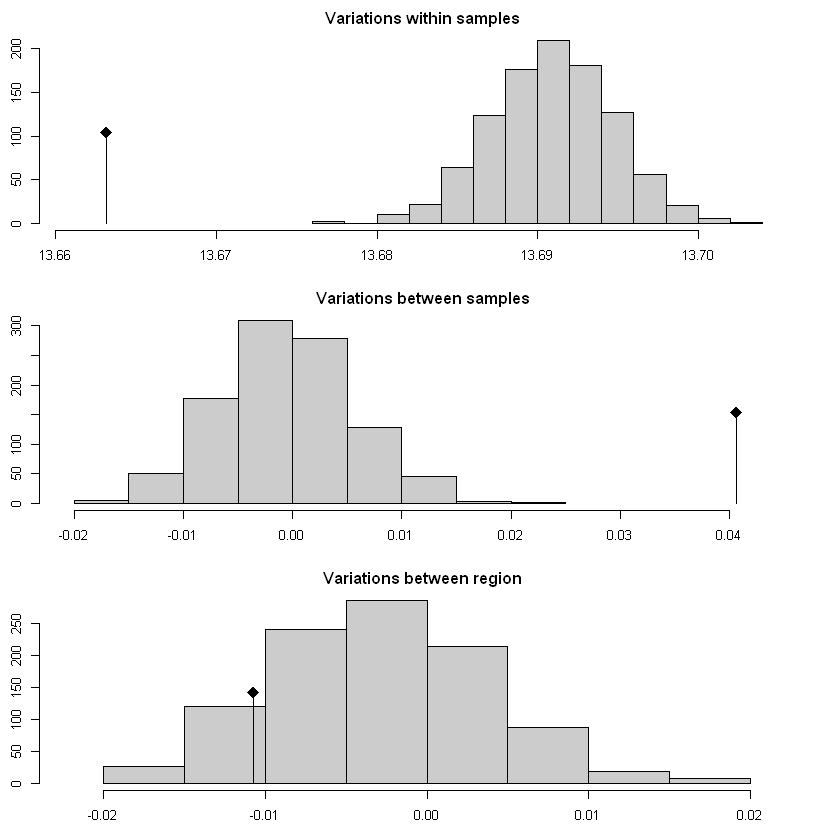

In [10]:
plot(signif.yr.reg)

## AMOVA region/locality/year

In [11]:
amv.loc.yr.reg <- poppr.amova(bft, hier = ~region/locality/year, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.loc.yr.reg

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                                 Df     Sum Sq  Mean Sq
Between region                    3   43.07107 14.35702
Between locality Within region    5   75.52214 15.10443
Between samples Within locality   5   72.05354 14.41071
Within samples                  310 4231.48419 13.64995
Total                           323 4422.13094 13.69081

$componentsofcovariance
                                                   Sigma            %
Variations  Between region                  -0.009489275  -0.06930196
Variations  Between locality Within region   0.013561773   0.09904417
Variations  Between samples Within locality  0.038629795   0.28212064
Variations  Within samples                  13.649948994  99.68813715
Total variations                            13.692651286 100.00000000

$statphi
                               Phi
Phi-samples-total     0.0031186285
Phi-samples-locality  0.0028220457
Phi-locality-region

### Test for significance

In [12]:
signif.loc.yr.reg <- randtest(amv.loc.yr.reg, nrepet = 999)
signif.loc.yr.reg

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.loc.yr.reg, nrepet = 999)

Number of tests:   4 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                         Test          Obs    Std.Obs   Alter Pvalue
1   Variations within samples 13.649948994 -9.0925380    less  0.001
2  Variations between samples  0.038629795  4.0412265 greater  0.001
3 Variations between locality  0.013561773  0.4996777 greater  0.379
4   Variations between region -0.009489275 -0.8322270 greater  0.815


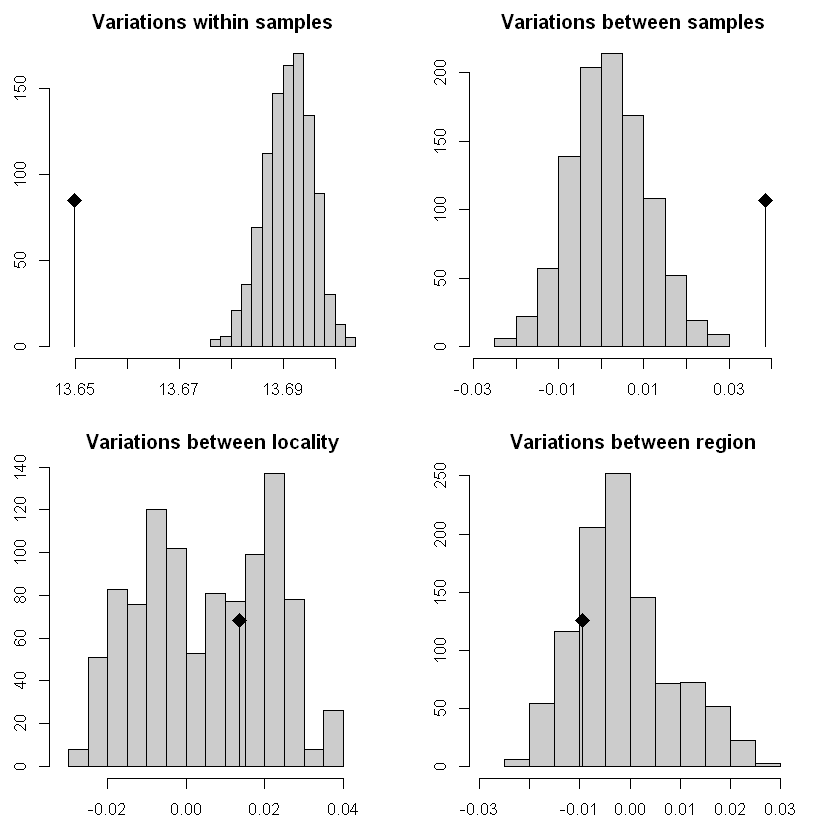

In [13]:
plot(signif.loc.yr.reg)